# Project 1
### EDA Portfolio
### Exploratory Data Analysis | Data Cleaning | Insights | Visual Storytelling

**Author**: *Rohith Jangam*

**Dataset**: [Zomato Bangalore Restaurants Dataset - Kaggle](https://www.kaggle.com/datasets/himanshupoddar/zomato-bangalore-restaurants)

---

### Objective
To explore and analyze restaurant data in Bangalore, India, 
- Edentify patterns,
- Clean messy data,
- Extract actionable business insights using data visualization techniques.

---


In [2]:
# Import required libraries

import pandas as pd
import numpy as np

#Visuals
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# For Warnings
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv('zomato.csv')

In [4]:
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


##  Table of Contents
1. [Data Overview](#data-overview)
2. [Data Cleaning & Preprocessing](#data-cleaning)
3. [Univariate Analysis](#univariate)
4. [Bivariate & Multivariate Analysis](#bivariate)
5. [Interesting Visualizations](#viz)
6. [Key Insights](#insights)
7. [Recommendations](#recommendations)
8. [Conclusion](#conclusion)

# 1. Data Overview

In [7]:
print(f"Rows:{df.shape[0]}, Columns:{df.shape[1]} ")

Rows:51717, Columns:17 


In [8]:
# Check for  data types and null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

In [9]:
# Check for total missing values 
df.isnull().sum().sort_values(ascending= False)

dish_liked                     28078
rate                            7775
phone                           1208
approx_cost(for two people)      346
rest_type                        227
cuisines                          45
location                          21
listed_in(type)                    0
menu_item                          0
reviews_list                       0
url                                0
address                            0
votes                              0
book_table                         0
online_order                       0
name                               0
listed_in(city)                    0
dtype: int64

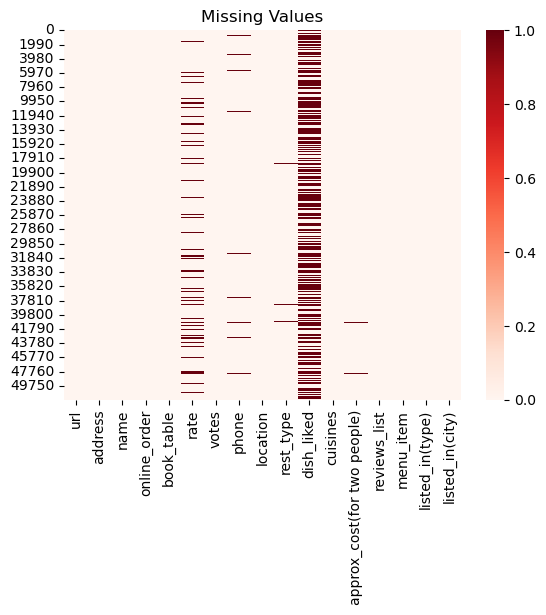

In [10]:
# Visualise Missing data
sns.heatmap(df.isnull(), cmap='Reds' , )
plt.title("Missing Values")
plt.show()

In [12]:
# Check for number of duplicate rows
duplicates = df.duplicated().sum()
print(f"Duplicated Rows: {duplicates}")

Duplicated Rows: 0


In [14]:
# Summary of Numerical features
df.describe()

,votes
count,51717.000000
mean,283.697527
std,803.838853
min,0.000000
25%,7.000000
50%,41.000000
75%,198.000000
max,16832.000000


### Initial Observations

- The dataset contains **51,717 rows** and **17 columns**.
- Most columns are of type `object`, except for `votes` which is `int64`. Some text columns (like `rate` and `approx_cost(for two people)`) contain numeric values in string format and will require cleaning.
- Key columns with missing values include:
  - `rate`: ~ 7,775 missing values.
  - `dish_liked`: ~27,000 missing — optional free-text field, may be dropped or filled with a placeholder.
  - `phone`: ~1,200 missing — may be dropped as not useful for analysis.
  - `cost` (approx_cost): ~346 missing — important for price analysis, can fill with median or mean.
  - `rest_type`, `cuisines`, `location`: have small amounts of missing data, can be filled with `"Unknown"` or similar.
- Columns like `url`, `address`, and `phone` may not add analytical value — candidates for removal.
- The `votes` column has a high variance and some extreme values (`max = 16832`) — may require outlier analysis or log transformation.
- Columns like `reviews_list` and `menu_item` appear to be large free-text fields with no nulls — very messy and may be dropped unless used for NLP.
- No obvious issues with `online_order`, `book_table`, `listed_in(city)` and `listed_in(type)`.

---


# 2. Data Cleaning & Preprocessing


We remove the following columns:
- `url`: Hyperlink to Zomato — not useful for analysis
- `phone`: Inconsistent and sparse
- `menu_item` & `reviews_list`: Free text, messy and out-of-scope for this analysis
- `address`: Too granular and repetitive with `location`

This helps simplify the dataset and focus only on meaningful features.

In [19]:
df.drop(['url', 'phone', 'address', 'menu_item', 'reviews_list'], axis=1, inplace=True)

### Renaming Columns

To make the dataset cleaner and more readable, the following columns are being  renamed:

- `approx_cost(for two people)` → `cost`
- `listed_in(type)` → `service_type`
- `listed_in(city)` → `city`

This improves code readability and simplifies future references during analysis.

In [22]:
# Renaming columns for better redability and 
df.rename(columns={
    'approx_cost(for two people)': 'cost',
    'listed_in(type)': 'service_type',
    'listed_in(city)':'city'
},inplace = True)

In [23]:
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,cost,service_type,city
0,Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,Buffet,Banashankari
4,Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,Buffet,Banashankari


In [24]:
print(df['rate'].unique())

['4.1/5' '3.8/5' '3.7/5' '3.6/5' '4.6/5' '4.0/5' '4.2/5' '3.9/5' '3.1/5'
 '3.0/5' '3.2/5' '3.3/5' '2.8/5' '4.4/5' '4.3/5' 'NEW' '2.9/5' '3.5/5' nan
 '2.6/5' '3.8 /5' '3.4/5' '4.5/5' '2.5/5' '2.7/5' '4.7/5' '2.4/5' '2.2/5'
 '2.3/5' '3.4 /5' '-' '3.6 /5' '4.8/5' '3.9 /5' '4.2 /5' '4.0 /5' '4.1 /5'
 '3.7 /5' '3.1 /5' '2.9 /5' '3.3 /5' '2.8 /5' '3.5 /5' '2.7 /5' '2.5 /5'
 '3.2 /5' '2.6 /5' '4.5 /5' '4.3 /5' '4.4 /5' '4.9/5' '2.1/5' '2.0/5'
 '1.8/5' '4.6 /5' '4.9 /5' '3.0 /5' '4.8 /5' '2.3 /5' '4.7 /5' '2.4 /5'
 '2.1 /5' '2.2 /5' '2.0 /5' '1.8 /5']


###  Cleaning `rate` Column

- The `rate` column originally contained strings like `'4.1/5'`, `'NEW'`, and `'-'`.
- We removed the `/5` and converted valid ratings to float.
- Special cases like `'NEW'` or `'-'` were replaced with `NaN`.

This prepares the `rate` column for numerical analysis and visualization.

In [26]:
df['rate'] = (
    df['rate']
    .astype('str')  # Convert all values to string
    .str.strip()    # Remove extra spaces
    .replace(['NEW', '-', 'nan', ''], np.nan)  # Replace junk with NaN
    .str.extract(r'(\d+\.\d+)')  # Extract float value using regex
    .astype(float)  # Convert to float
)

print(df['rate'].unique())

[4.1 3.8 3.7 3.6 4.6 4.  4.2 3.9 3.1 3.  3.2 3.3 2.8 4.4 4.3 nan 2.9 3.5
 2.6 3.4 4.5 2.5 2.7 4.7 2.4 2.2 2.3 4.8 4.9 2.1 2.  1.8]


### Cleaning `cost` Column

- Removed commas from values like `'2,000'` → `2000`
- Replaced invalid entries like `'nan'` or `''` with `NaN`
- Converted the column to `float` type for numeric analysis

This prepares the `cost` column for price distribution analysis and comparisons.

In [29]:
df['cost'] = (
    df['cost']
    .astype(str)                      # Convert to string
    .str.replace(',', '')             # Remove commas
    .replace(['nan', ''], np.nan)     # Handle junk/nulls
    .astype(float)                    # Convert to float
)

print(df['cost'].unique())

[ 800.  300.  600.  700.  550.  500.  450.  650.  400.  900.  200.  750.
  150.  850.  100. 1200.  350.  250.  950. 1000. 1500. 1300.  199.   80.
 1100.  160. 1600.  230.  130.   50.  190. 1700.   nan 1400.  180. 1350.
 2200. 2000. 1800. 1900.  330. 2500. 2100. 3000. 2800. 3400.   40. 1250.
 3500. 4000. 2400. 2600.  120. 1450.  469.   70. 3200.   60.  560.  240.
  360. 6000. 1050. 2300. 4100. 5000. 3700. 1650. 2700. 4500.  140.]


In [30]:
df.isnull().sum() #Total no. of missing values

name                0
online_order        0
book_table          0
rate            10052
votes               0
location           21
rest_type         227
dish_liked      28078
cuisines           45
cost              346
service_type        0
city                0
dtype: int64

###  Handling Missing Values

- `rate` and `cost` were numeric columns; missing values were filled with the **mean**.
- `rest_type`, `cuisines`, and `location` were filled with `"Unknown"` since they’re categorical.
- `dish_liked` was treated as optional user text, and missing values were filled with `"Not Available"`.

No rows were dropped; this helps preserve the full dataset for analysis.

In [33]:
# Fill numeric with mean
df['rate'].fillna(df['rate'].mean(), inplace = True)
df['cost'].fillna(df['cost'].mean(), inplace = True)

#Fill categorical with placeholders

df['rest_type'].fillna('Unknown', inplace = True)
df['cuisines'].fillna("Unknown", inplace=True)
df['dish_liked'].fillna("Not Available", inplace=True)
df['location'].fillna("Unknown", inplace=True)

In [34]:
df.isnull().sum()

name            0
online_order    0
book_table      0
rate            0
votes           0
location        0
rest_type       0
dish_liked      0
cuisines        0
cost            0
service_type    0
city            0
dtype: int64

###  Dropping Duplicate Rows

- We identify and remove **X** duplicate rows using `df.duplicated()`.
- This ensures accurate statistical summaries and prevents redundancy in visualizations and insights.

In [37]:
# Check for duplicates
print(f"Duplicate rows before dropping:{df.duplicated().sum() } ")

# Drop duplicates
df.drop_duplicates(inplace = True)

# Confirm duplicates
print(f"Duplicate rows after dropping: {df.duplicated().sum()} ")

Duplicate rows before dropping:108 
Duplicate rows after dropping: 0 


### Resetting the Index

After removing duplicate rows, we reset the DataFrame index to ensure it's continuous and clean.

This is especially useful when exporting data or aligning plots with row numbers.

In [40]:
df.reset_index(drop = True,inplace = True)


#drop=True: avoids adding old index as a column

#inplace=True: modifies the DataFrame directly

## 3. Univariate Analysis

### What is Univariate Analysis?

### Definition:
**Univariate Analysis** refers to analyzing **one variable (column)** at a time — to understand its **distribution**, **characteristics**, and **behavior** without involving other columns.

---

### Why it matters in EDA:
- Helps understand the **shape of the data** (normal, skewed, uniform, etc.)
- Detects **outliers**, **imbalances**, and **invalid values**
- Prepares data for **transformation, binning, or feature engineering**
- It's the **first real step** in data analysis after cleaning — a foundation for deeper insights




In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51609 entries, 0 to 51608
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          51609 non-null  object 
 1   online_order  51609 non-null  object 
 2   book_table    51609 non-null  object 
 3   rate          51609 non-null  float64
 4   votes         51609 non-null  int64  
 5   location      51609 non-null  object 
 6   rest_type     51609 non-null  object 
 7   dish_liked    51609 non-null  object 
 8   cuisines      51609 non-null  object 
 9   cost          51609 non-null  float64
 10  service_type  51609 non-null  object 
 11  city          51609 non-null  object 
dtypes: float64(2), int64(1), object(9)
memory usage: 4.7+ MB


In [45]:
df_float = df.select_dtypes(include='float').columns.tolist()
df_int =  df.select_dtypes(include='int').columns.tolist()
df_num = df_float +  df_int
df_cat = df.select_dtypes(include='object').columns.tolist()
print(df_num)
print(df_cat)

['rate', 'cost', 'votes']
['name', 'online_order', 'book_table', 'location', 'rest_type', 'dish_liked', 'cuisines', 'service_type', 'city']


###  Univariate Analysis – Numerical Features

####  What We Look For:
- **Distribution Shape** – normal, skewed, uniform?
- **Central Tendency** – where is the data concentrated?
- **Spread** – is the data tightly packed or widely spread?
- **Outliers** – are there extreme values that could distort analysis?
- **Skewness** – right or left skew affects model assumptions and feature scaling

---
These distributions guide decisions like:
- Feature scaling (e.g., log transformation)
- Binning strategies
- Handling outliers
- Choosing the right visualizations and ML models

### UNIVARIANT PLOTS FOR NUMERICALS

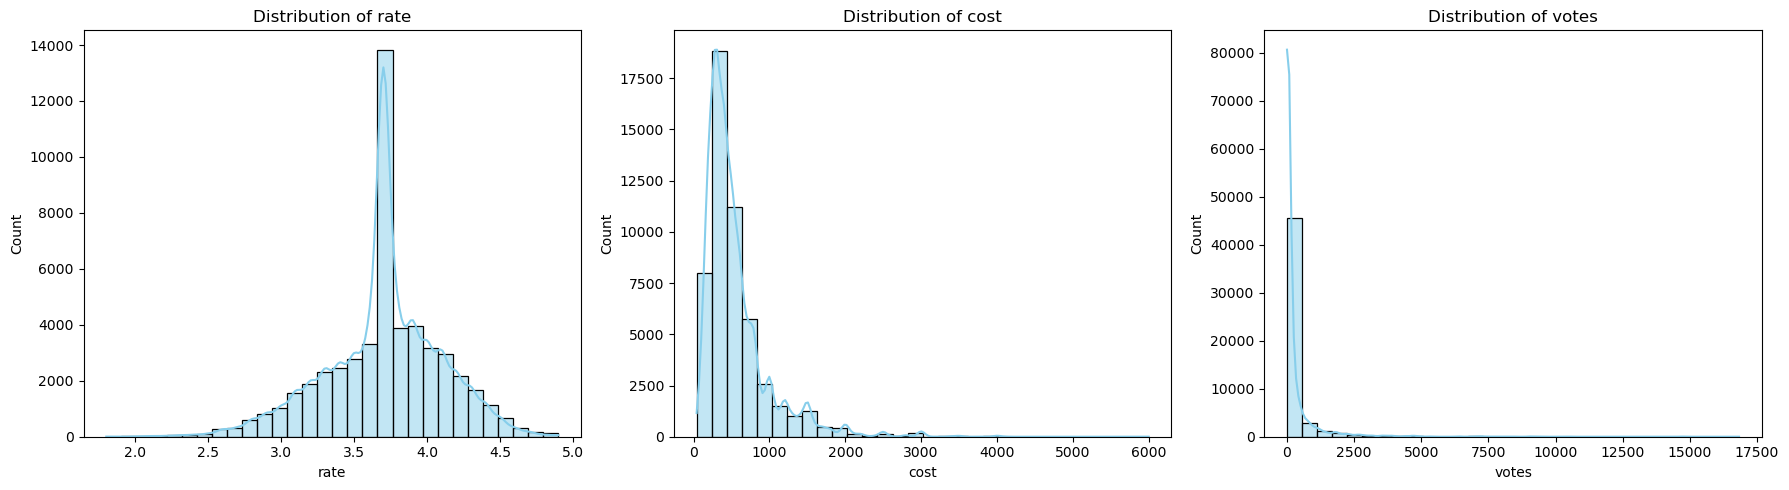

In [49]:

# Total number of plots
n = len(df_num)

# Create sub plots

plt.figure(figsize = (6*n,5)) # Dynamically scales width

for i , col in enumerate(df_num,1):
    plt.subplot(1, n , i) # 1 row, n-columns, i-th position
    sns.histplot(df[col], bins=30,kde = True, color='skyblue' )
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()


####  Key Insights from Numerical Columns:

- **Rating (`rate`)**:
  - Sharp peak around **3.9 to 4.1**
  - Most restaurants have high ratings; values <3.0 are rare
  - Implies potential **rating inflation or system bias**
  - Rating might benefit from **binning into categories** (e.g., low, medium, high)

- **Cost for Two (`cost`)**:
  - Strong **right skew**
  - Most values fall between **₹200–₹1000**
  - Long tail of expensive restaurants suggests potential for **log transformation** or **outlier handling**
  - Good candidate for **price category segmentation**

- **Votes**:
  - Extremely **right-skewed**
  - Majority of restaurants have low engagement
  - A few restaurants with thousands of votes — potential **influencers** or **popular spots**
  - May need **log transformation** before use in modeling

---

###  Univariate Analysis – Categorical Features

####  What We Look For:
- **Dominant Categories** – which values appear most frequently?
- **Class Imbalance** – are some categories over/underrepresented?
- **Unique Categories** – how many levels does this feature have?
- **Category Grouping** – should low-frequency categories be combined as "Others"?
- **Potential Usefulness** – is this feature meaningful or redundant?

---
These distributions guide decisions like:
- Helps identify **which features to include or drop**
- Important for **feature encoding** (One-Hot, Label Encoding)
- Reveals opportunities to **simplify** high-cardinality features (e.g., grouping rare types)
- Shows class imbalance that may need to be addressed in modeling


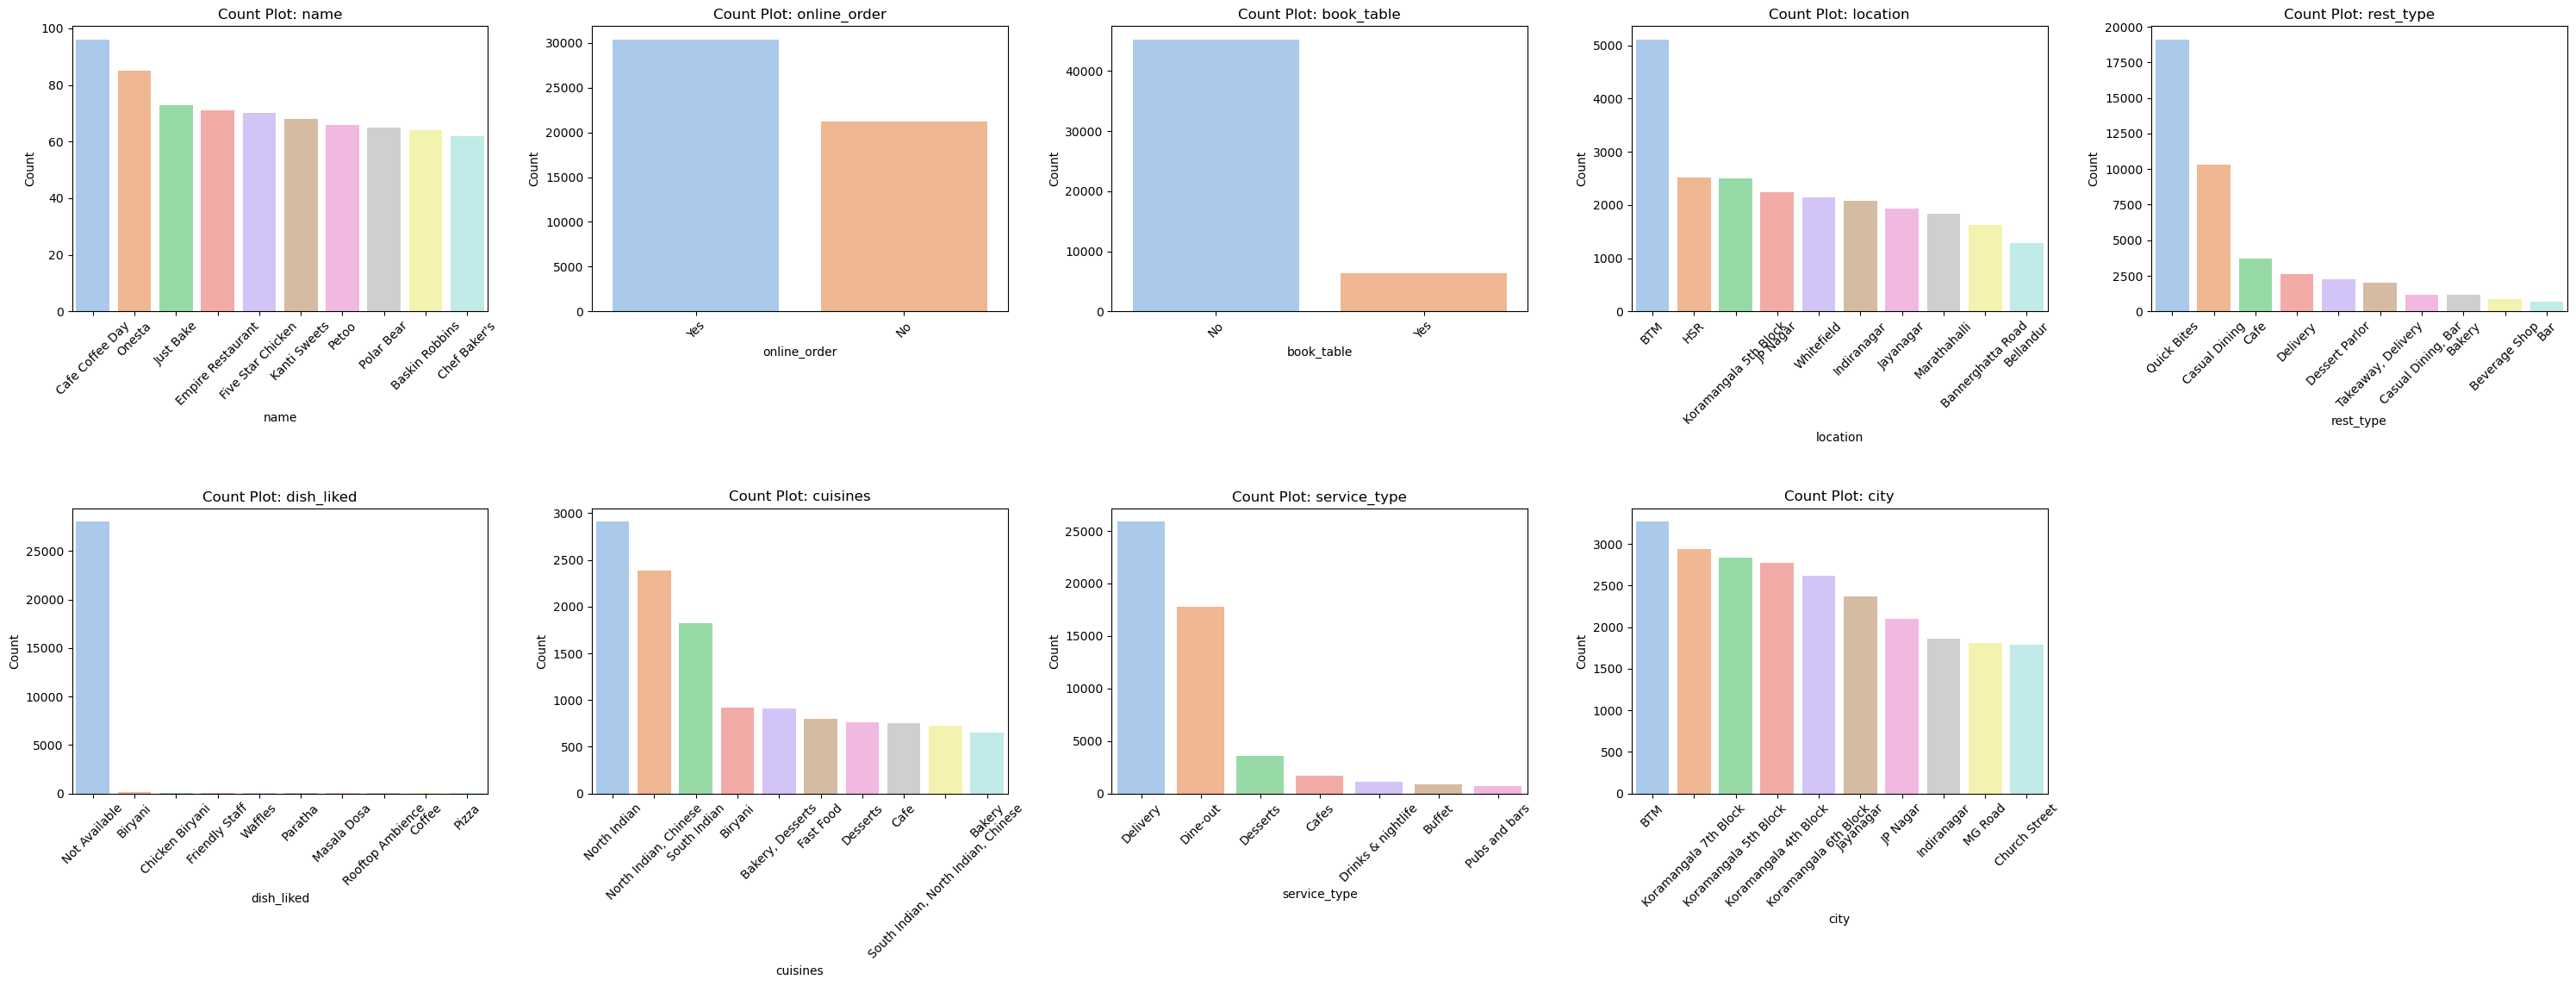

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns
from math import ceil

# Get number of categorical columns
n = len(df_cat)

# Decide layout: 2 rows, ceil(n/2) columns
rows = 3
cols = ceil(n / 2)

# Set dynamic figsize
plt.figure(figsize=(6 * cols, 5 * rows))

# Loop through categorical columns
for i, col in enumerate(df_cat, 1):
    plt.subplot(rows, cols, i)
    
    # Plot top 10 categories
    top_categories = df[col].value_counts().nlargest(10).index
    sns.countplot(
        data=df[df[col].isin(top_categories)],
        x=col,
        order=top_categories,
        palette='pastel'
    )
    
    plt.title(f'Count Plot: {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()



####  Key Observations:

- **Online Ordering**:
  - A large number of restaurants **support online ordering**, showing Zomato's strong digital presence.
  - Indicates potential for deeper analysis on how online availability affects ratings or votes.

- **Table Booking**:
  - Most restaurants **do not offer table booking**.
  - Could imply limited dine-in reservation infrastructure, or user preference for walk-ins.

- **Restaurant Type (`rest_type`)**:
  - **"Quick Bites"** and **"Casual Dining"** dominate the platform.
  - Niche types like `"Buffet"` and `"Pubs and Bars"` are rare — might group low-frequency types as `"Others"`.

- **Location**:
  - Top areas include **BTM**, **HSR**, **Koramangala** — known food hotspots in Bangalore.
  - These could be high-competition zones for marketing or premium listings.

- **City**:
  - Shows deep granularity in Zomato’s city breakdown — even different blocks of Koramangala are tracked individually.
  - May benefit from **grouping similar regions**.

- **Service Type (`service_type`)**:
  - **Delivery** is by far the most common — aligns with user demand patterns.
  - Options like `"Buffet"` or `"Pubs and Bars"` are underrepresented.

- **Popular Dishes (`dish_liked`)**:
  - **Biryani** and **Chicken Biryani** are the most liked — reflects regional food preferences.
  - `"Not Available"` appears often — may be missing data or irrelevant for some restaurants.

- **Cuisines**:
  - Dominated by **North Indian**, **Chinese**, and **South Indian**.
  - Several overlapping or niche cuisines present — can be grouped for simplification.

---

#### 🎯 What This Tells Us:
- There's **class imbalance** in most categorical features.
- Some features are **high-cardinality** (e.g., `name`, `location`) — might need grouping before modeling.
- Patterns from `online_order`, `service_type`, and `location` are potentially useful for clustering or classification tasks.

---


##  Bivariate Analysis

###  Definition:
**Bivariate Analysis** involves exploring the **relationship between two variables** to understand how they interact with each other.

It helps answer questions like:
- Does offering **online ordering** lead to higher **ratings**?
- Do certain **restaurant types** have **higher costs**?
- Are **votes** correlated with **ratings**?

---

### What We Look For:
- **Associations or correlations** between variables
- **Category-wise trends** (e.g., average rating by city)
- **Disparities or patterns** across groups
- Whether variables are **positively or negatively related**

---

###  Common Pairings:

| Variable Type 1     | Variable Type 2     | Common Plots          | Example                          |
|---------------------|---------------------|------------------------|----------------------------------|
| Categorical          | Numerical           | Boxplot, Violin Plot   | `rate` vs `online_order`         |
| Categorical          | Categorical         | Countplot, Heatmap     | `book_table` vs `online_order`   |
| Numerical            | Numerical           | Scatter, Regplot       | `votes` vs `cost`                |

Bivariate analysis is essential for identifying features that influence the target variable and may be important for modeling.


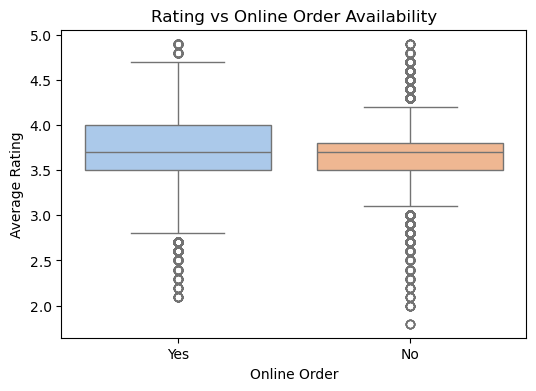

In [57]:
# Bivariant for numerical vs categorical
plt.figure(figsize=(6, 4))
sns.boxplot(data=df, x='online_order', y='rate', palette='pastel')
plt.title('Rating vs Online Order Availability')
plt.xlabel('Online Order')
plt.ylabel('Average Rating')
plt.show()

### 4. Bivariate Analysis: `rate` vs `online_order`

- **Observation**:
  Restaurants that support **online ordering** tend to have **slightly higher average ratings** compared to those that do not.

- **Median Rating**:
  - With Online Order: ~3.8
  - Without Online Order: ~3.6

- **Spread & Outliers**:
  - Both categories have similar rating spreads and outliers.
  - However, the upper quartile for online-order-enabled restaurants is slightly higher, suggesting better customer experience.

- **Interpretation**:
  The ability to order online may positively influence user satisfaction and, in turn, ratings — possibly due to convenience, delivery reliability, or better operational efficiency.

 This suggests that **online_order** could be a valuable feature in predictive modeling or clustering.


Co relation btw cost and rating: 0.364


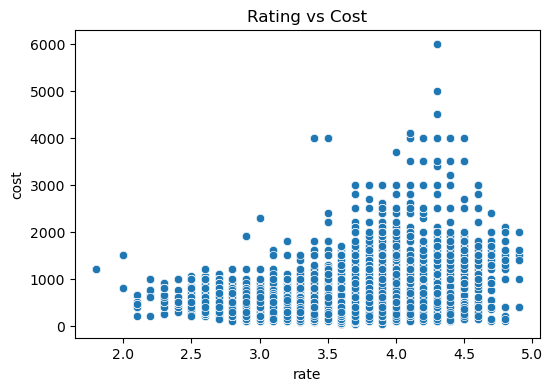

In [60]:
# Bivariant for numerical vs numerial
corr = df[['rate', 'cost']].corr()
print(f"Co relation btw cost and rating: {corr.loc['rate','cost']:.3f}")


plt.figure(figsize = (6,4))
sns.scatterplot(data = df, x = 'rate', y = 'cost', )
plt.title('Rating vs Cost')
plt.xlabel('rate')
plt.ylabel('cost')
plt.show()


####  What We See:
  **Correlation Value:** `0.364` ( This indicates a **moderate positive correlation** — as cost increases, ratings tend to increase slightly.)\
- The plot shows a **slightly upward trend** — meaning higher-rated restaurants may **sometimes** have higher costs.
- However, there's **a wide spread** in cost across almost all rating levels.
- Some restaurants with **lower ratings (2.5–3.5)** have **high costs**, and many highly rated ones are affordable too.

####  Insights:
- **No strong linear correlation** between cost and rating.
- This suggests that **restaurant pricing** is not a reliable indicator of how well-rated it is.
- Other factors like location, cuisine, or brand might be influencing cost more than customer satisfaction.

####  Conclusion:
- Rating is not a strong predictor of price.
- We may want to **log-transform** the `cost` column or **bin it** for clearer insights.


## Hypothesis Generation – Understanding Factors Influencing Restaurant Success

This section outlines key hypotheses designed to uncover patterns in customer preferences, restaurant popularity, and the influence of various features such as cost, location, and service type on ratings and customer engagement.

---

### Rating-Based Hypotheses

1. **Rating vs Cuisine Type**  
   Hypothesis: Certain cuisines receive consistently higher customer ratings, indicating stronger customer preferences.

2. **Rating vs Location**  
   Hypothesis: Restaurants in specific localities may receive higher average ratings due to factors such as food quality, customer demographics, or neighborhood affluence.

3. **Rating vs Service Type**  
   Hypothesis: The mode of service—such as delivery, dine-in, or takeaway—may impact overall customer satisfaction and ratings.

4. **Rating vs Restaurant Type**  
   Hypothesis: The format of a restaurant (e.g., Buffet, Café, Fine Dining) may influence customer ratings based on dining experience and expectations.

---

### Votes-Based Hypotheses

5. **Votes vs Location**  
   Hypothesis: Locations with high vote counts may reflect higher customer traffic, greater visibility, or popularity.

6. **Votes vs Cuisines**  
   Hypothesis: Some cuisines may attract more customer engagement, reflected in higher vote counts.

7. **Votes vs Restaurant Type or City**  
   Hypothesis: Certain restaurant types or cities may receive more votes due to factors like urban culture, lifestyle trends, or tourism volume.

---

### Votes vs Cost Hypothesis

8. **Votes vs Cost**  
   Hypothesis: The number of votes may vary based on pricing:
   - Low-cost restaurants may attract more votes due to affordability and mass appeal.
   - High-cost restaurants may receive more votes if they offer premium experiences.

---

### Online Ordering Behavior Hypotheses

9. **Votes vs Online Order**  
   Hypothesis: Restaurants that provide online ordering options may receive more customer engagement due to improved accessibility and convenience.

10. **High Votes and Online Order Status as an Indicator of Customer Preference**  
    Hypothesis:
    - High votes with online ordering enabled may indicate a preference for delivery-oriented experiences.
    - High votes without online ordering may reflect a strong preference for dine-in environments.
    
    Objective: To determine whether customer engagement patterns align more with delivery-based or on-premise dining experiences.

---




## Interesting Visualizations

In this section, we go beyond basic univariate and bivariate analysis to create visually engaging and insightful plots.  
These visualizations combine multiple variables, highlight contrasts, and reveal patterns that are not immediately visible in raw statistics.

The goal is to:
- Identify relationships and correlations between key metrics.
- Explore differences across locations, cuisines, and restaurant types.
- Highlight outliers and unexpected trends that may impact business decisions.

The following visualizations are included:
1. **Correlation Heatmap** – Shows relationships between ratings, cost, and votes.
2. **Bubble Chart** – Compares cost and votes, with bubble size and color representing ratings.
3. **Boxplot by Location** – Highlights cost variations across the top 10 locations.
4. **Average Rating by Cuisine** – Displays customer preferences for the most popular cuisines.


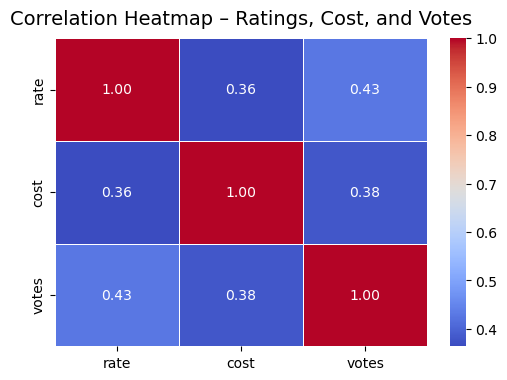

In [64]:
# Select only the relevant numerical columns
num_cols = ['rate', 'cost', 'votes']

plt.figure(figsize=(6, 4))
sns.heatmap(
    df[num_cols].corr(), 
    annot=True,          # Show correlation values
    cmap='coolwarm',     # Color scheme
    linewidths=0.5,      # Lines between cells
    fmt=".2f"            # Decimal format
)
plt.title('Correlation Heatmap – Ratings, Cost, and Votes', fontsize=14, pad=10)
plt.show()


### Correlation Heatmap – Ratings, Cost, and Votes

This heatmap visualizes the pairwise correlation between three key numerical features:  
- **Rating**
- **Cost**
- **Votes**

**Insights:**
- Ratings and Votes have a moderate positive correlation (**0.43**), suggesting that highly-rated restaurants tend to receive more customer engagement.
- Cost shows a weaker positive correlation with both Ratings (**0.36**) and Votes (**0.38**), indicating that higher-priced restaurants may receive slightly better ratings and more votes, but the relationship is not strong.
- No strong multicollinearity is present, meaning each variable contributes unique information to the dataset.


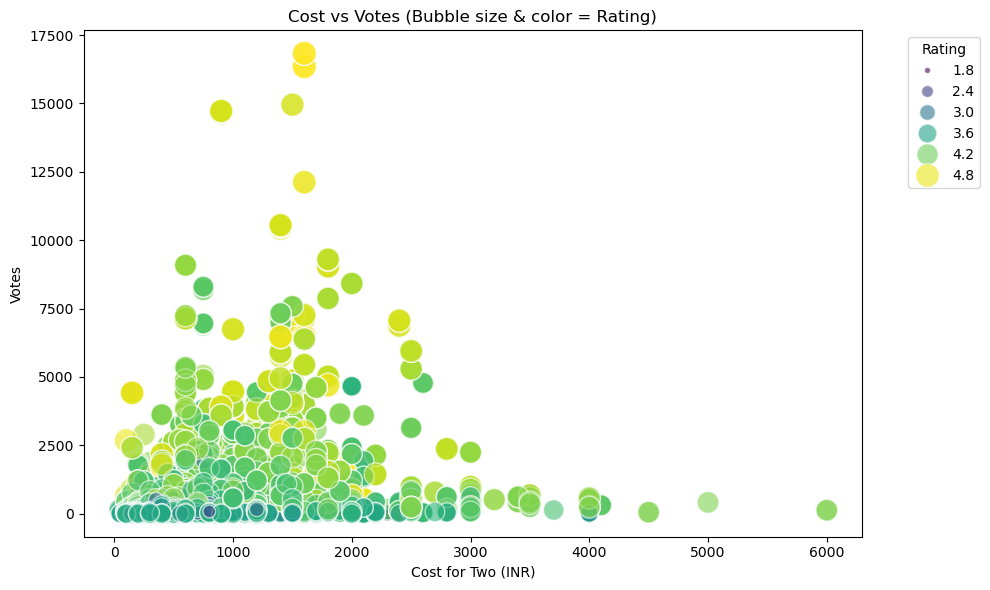

In [66]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df, x='cost', y='votes',
    hue='rate', size='rate',
    sizes=(20, 300), alpha=0.6, palette='viridis'
)
plt.title('Cost vs Votes (Bubble size & color = Rating)')
plt.xlabel('Cost for Two (INR)')
plt.ylabel('Votes')
plt.legend(title='Rating', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


### Cost vs Votes – Bubble Plot (Bubble Size & Color = Rating)

This bubble chart visualizes the relationship between **Cost for Two (INR)** and **Votes**, with:

**Insights:**
- Most restaurants are concentrated in the low-to-mid cost range (₹200–₹2000).
- Higher ratings (lighter yellow bubbles) appear across various cost levels but tend to be more frequent in the mid-range cost category.
- Extremely high vote counts are rare and are generally associated with restaurants in the affordable-to-mid price segment, indicating higher footfall or popularity.
- Very high-cost restaurants (₹4000+) receive comparatively fewer votes, suggesting a niche customer base.


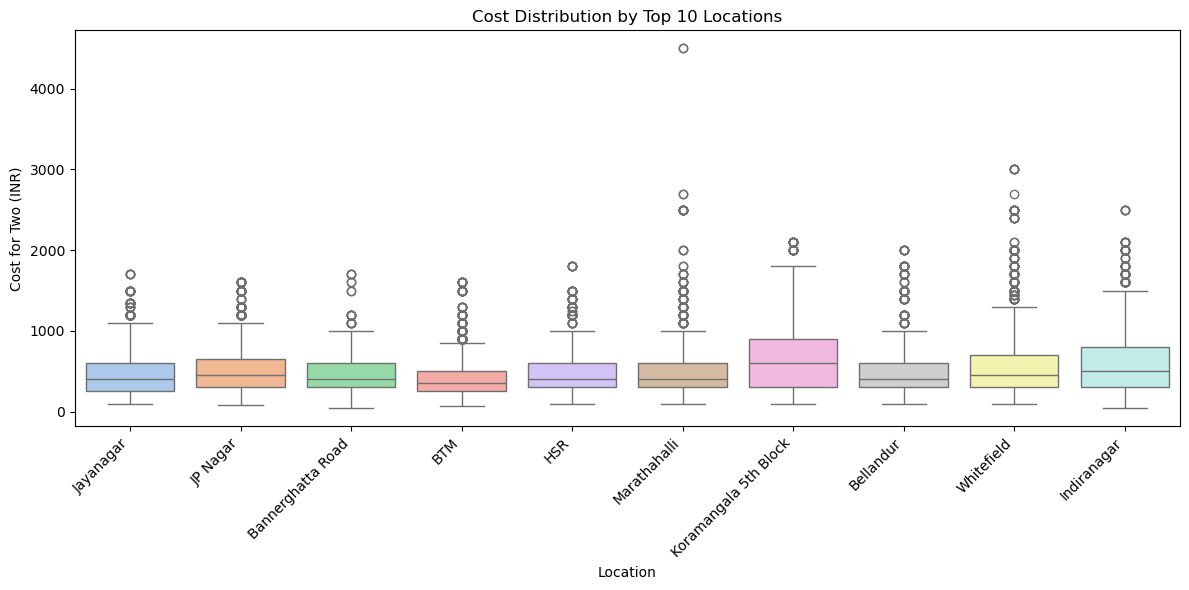

In [68]:
top_locs = df['location'].value_counts().nlargest(10).index
plt.figure(figsize=(12, 6))
sns.boxplot(
    data=df[df['location'].isin(top_locs)],
    x='location', y='cost', palette='pastel'
)
plt.title('Cost Distribution by Top 10 Locations')
plt.xlabel('Location')
plt.ylabel('Cost for Two (INR)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### Cost Distribution by Top 10 Locations

This box plot compares the distribution of **Cost for Two (INR)** across the top 10 most popular locations.

**Insights:**
- **Koramangala 5th Block** and **Indiranagar** show higher median and upper quartile costs, indicating a generally more expensive dining experience in these areas.
- **BTM** and **Bellandur** have lower median costs, suggesting they are relatively budget-friendly dining zones.
- All locations show the presence of outliers, representing premium restaurants charging significantly higher prices than the median.
- Some locations like **Marathahalli** have extreme high-cost outliers (₹4000+), indicating a niche segment for fine dining.


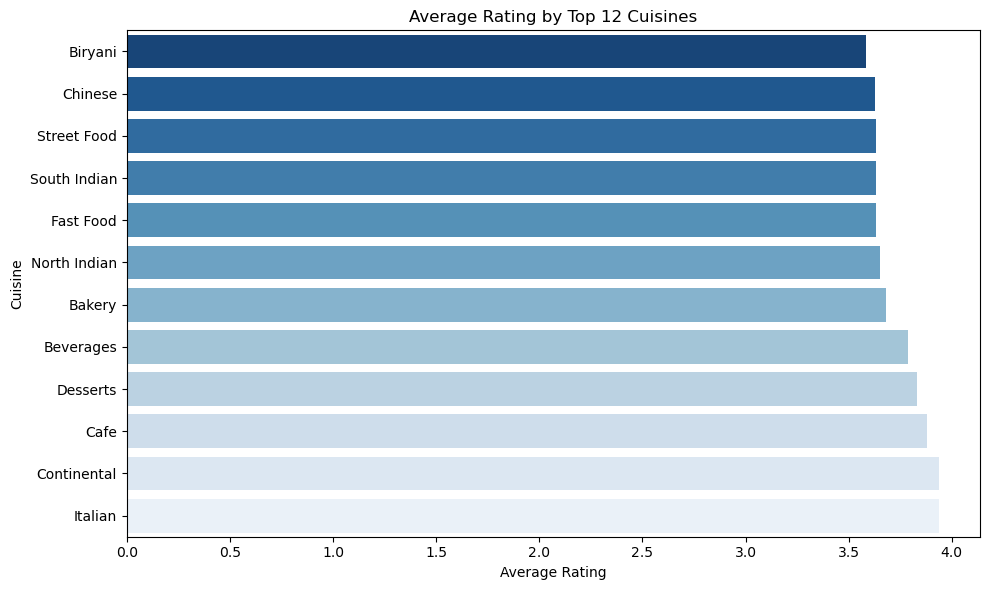

In [70]:
# Split comma-separated cuisines, clean, and explode
cuisines_clean = (
    df.assign(cuisines=df['cuisines'].str.split(','))
      .explode('cuisines')
)
cuisines_clean['cuisines'] = cuisines_clean['cuisines'].str.strip()
# Keep top N frequent cuisines to avoid long tails
top_c = cuisines_clean['cuisines'].value_counts().nlargest(12).index

avg_rate_by_cuisine = (
    cuisines_clean[cuisines_clean['cuisines'].isin(top_c)]
    .groupby('cuisines', as_index=False)['rate'].mean()
    .sort_values('rate', ascending=True)
)

plt.figure(figsize=(10, 6))
sns.barplot(data=avg_rate_by_cuisine, x='rate', y='cuisines', palette='Blues_r')
plt.title('Average Rating by Top 12 Cuisines')
plt.xlabel('Average Rating')
plt.ylabel('Cuisine')
plt.tight_layout()
plt.show()


### Average Rating by Top 12 Cuisines

This horizontal bar chart highlights the average customer ratings for the 12 most popular cuisine categories.

**Insights:**
- **Biryani**, **Chinese**, and **Street Food** rank at the top, showing consistently high customer satisfaction.
- **South Indian**, **Fast Food**, and **North Indian** cuisines also perform strongly, with average ratings above most other categories.
- Premium international cuisines like **Italian** and **Continental** maintain competitive ratings, suggesting a steady niche demand.
- The narrow variation in ratings indicates that cuisine type alone may not be a strong differentiator in overall customer satisfaction, though certain cuisines consistently outperform others.


## Key Insights

1. **Ratings & Cost**  
   - Moderate positive correlation between cost and rating (r ≈ 0.36).  
   - Higher-priced restaurants tend to have slightly better ratings, but the relationship is not very strong.  

2. **Ratings & Cuisines**  
   - Biryani, Chinese, and Street Food consistently achieve high ratings.  
   - Most cuisines have similar ratings, suggesting other factors (e.g., service type, location) influence customer perception more than cuisine alone.  

3. **Votes & Cost**  
   - Slight positive correlation between votes and cost (r ≈ 0.38).  
   - Some high-cost restaurants attract significant votes, possibly due to premium experience or brand popularity.  

4. **Votes & Location**  
   - Certain areas (e.g., Indiranagar, Koramangala) see higher customer engagement, suggesting these are popular dining hubs.  

5. **Online Ordering Impact**  
   - Restaurants with online ordering enabled often have higher vote counts, indicating delivery convenience increases customer interaction.  

---

## Recommendations

1. **Menu Strategy**  
   - Introduce or promote top-rated cuisines (Biryani, Chinese, Street Food) to attract higher ratings.  

2. **Location Targeting**  
   - Focus expansion or marketing in high-engagement areas like Indiranagar and Koramangala.  

3. **Balanced Pricing**  
   - Maintain mid-range pricing for broader appeal, but leverage premium pricing in areas where cost correlates with higher ratings.  

4. **Online Ordering Optimization**  
   - For restaurants without online ordering but high foot traffic, consider adding delivery to capture a wider audience.  

5. **Customer Engagement**  
   - Run campaigns to encourage more reviews and votes, especially in lower-engagement locations.  

---

## Conclusion

The analysis shows that restaurant performance is influenced by multiple factors — pricing, location, cuisine type, and online ordering availability.  
While cuisine type does impact ratings, location and service format (delivery vs dine-in) appear equally important. Votes are a strong indicator of popularity and customer engagement, often aligning with locations that have higher dining footfall.  

A data-driven strategy focusing on top-performing cuisines, targeted locations, optimized pricing, and improved online accessibility can help restaurants maximize both customer satisfaction and business growth.  
